**1° Proytecto Final:**
 **Analisis del conjunto de datos "Incumplimiento de pagos de clientes de tarjetas de crédito"**

---



**Descripción:**

---


Este proyecto tiene como objetivo realizar un análisis de datos del conjunto "Incumplimiento de pagos de clientes de tarjetas de crédito". En él se explorará el conjunto de datos para analizar los factores que influyen en la tasa de impago de las tarjetas de crédito.
El estudio de los factores que determinan el no pago de las tarjetas de crédito, es de suma importancia para los emisores de las tarjetas, ya que si se sabe cuáles factores influyen o determinan el pago o no del crédito otorgado, las compañías podrían otorgarle solamente tarjetas de crédito a las personas que pueden devolver el monto otorgado.


**Alcance:**

---


Este proyecto está dirigido a cualquier persona interesada en aprender técnicas de análisis de datos, y modelado predictivo. También podría ser útil para empresas de servicios financieros interesados en identificar los factores que influyen en la tasa de pago del saldo de las tarjetas de créditos.


**Preguntas/Problema que buscamos resolver:**

---

El objetivo principal de este proyecto es desarrollar un modelo predictivo para identificar los clientes que tienen más probabilidades de no abonar el resumen de su tarjeta de crédito. Algunas preguntas específicas que buscamos responder son:

* ¿Cuáles son los factores que influyen en abonar o no abonar el resumen de la tarjeta de crédito?
* ¿Hay alguna relación entre el nivel de educación, genero, edad, estado civil o monto limite que se le otorgo, en la probabilidad de pago de la tarjeta?
* ¿Que tan precisos son los modelos de predicción para identificar a los clientes con mayor probabilidad de no pagar?







**AUTOR: MIKELJ TOMAS LADISLAO**

---



**2° importación de datos y librerias**

---



In [3]:
# Importación de librerias para la manipulación de datos y visualización de los mismos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [6]:
# Importación de los datos:
from google.colab import files
uploaded = files.upload()


Saving dataset_trabajo.xls to dataset_trabajo.xls


In [7]:
# Creación del DATAFRAME
df= pd.read_excel('dataset_trabajo.xls')


In [8]:
# Corroboración de que esta bien creado y cargado del DATAFRAME:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**N° 3 ANÁLISIS EXPLORATORIO DE DATOS**

---



**LAS VARIABLES DEL CONJUNTO SON LAS SIGUIENTES:**
*   ID: Identificador del registro

---


*   X1: Monto del crédito otorgado

---



*   X2: Genero:
*   1= Masculino
*   2= Femenino

---



*   X3:  Nivel de Educación
*   1= Esculea de Posgrado
*   2= Univiersidad
*   3= Escuela Secundaria
*   4= Otros

---




*   X4: Estado Civil
*   1= Casado
*   2= Soltero
*   3= Otros

---



*   X5: Edad

---



*   X6: Estado de pago en septiembre de 2005
*   X7: Estado de pago en agosto de 2005
*   X8: Estado de pago en julio de 2005
*   X9:Estado de pago en junio de 2005
*   X10: Estado de pago en Mayo de 2005
*   X11: Estado de pago en Abril de 2005


*   **La escala de medición para el estado de pago es:**
*   -1=Puntual
*   1= Retraso en el pago de un mes
*   2= Retraso en el pago de dos meses
*   3= Retraso en el pago de tres meses
*   4=Retraso en el pago de Cuatro meses
*   5= Retraso en el pago de cinco meses
*   6= Retraso en el pago de seis meses
*   7= Retraso en el pago de siete meses
*   8= Retraso en el pago de ocho meses
*   9: Retraso en el pago de nueve o mas meses.

---
*   X12: Importe del estado de cuenta en septiembre de 2005
*   X13: Importe del estado de cuenta en Agosto de 2005
*   x14:Importe del estado de cuenta en julio de 2005
*   x15: Importe del estado de cuenta en junio de 2005
*   X16: Importe del estado de cuenta en mayo de 2005
*  X17: Importe del estado de cuenta en abil de 2005

---


*   X18: importe del pago de septiembre de 2005
*   X19: importe del pago de Agosto de 2005
*   X20: importe del pago de julio de 2005
*   X21: importe del pago de junio de 2005
*   X22: importe del pago de mayo de 2005
*   X23: importre del pago de abril de 2005
---
*   **Y: Variable respuesta**

*   1= Paga
*   0= No paga
---


















**N° 3.1 INFORMACIÓN GENRAL SOBRE EL CONJUNTO DE DATOS**

In [9]:
#Tamaño del conjunto de datos:
print("Filas, Columnas", df.shape)

Filas, Columnas (30000, 25)


In [10]:
# Nombre de las Varibles:
print("Nombres de las variables", df.columns)

Nombres de las variables Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [11]:
# Tipo de datyos de cada Variable:
print("tipos de datos", df.dtypes)

tipos de datos ID     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object


In [12]:
# Presencia de valores faltantes o nulos:
print("Valores Nulos", df.isnull().sum())

Valores Nulos ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


No hay valores nulos en el data set


In [13]:
# Estadistica descriptiva de las variables:
print("Estadísticas", df.describe(include=[np.number]))

Estadísticas                  ID              X1            X2            X3            X4  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                 X5            X6            X7            X8            X9  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904 

Lo mas importante de observar aqui, es la media de x1 (valor otrogado) que es de 1.600 USd en promedio, y que la media de la edad de los clientes es de 35.4 años.

**N° 3.2 ANÁLISIS DE VALORES ATÍPICOS**

---



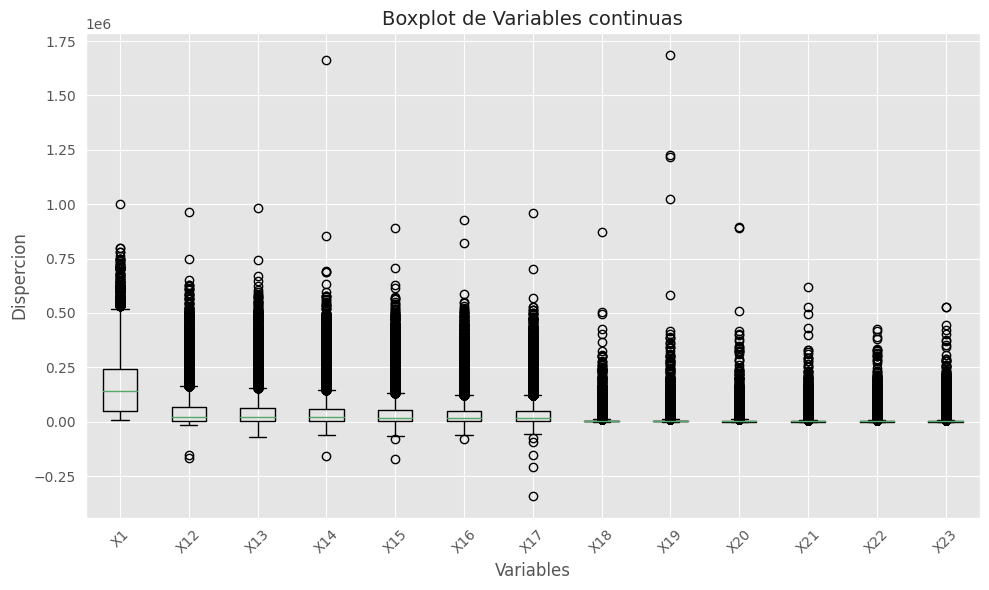

In [14]:
# Boxplot variables Continuas (X1 to X23)
columns = ['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([df[col] for col in columns])
ax.set_title('Boxplot de Variables continuas', fontsize=14)
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Dispercion', fontsize=12)
ax.set_xticklabels(columns, rotation=45)
plt.tight_layout()
plt.show()


Se observa que hay una gran variacion en cada variable, es decir, que pueden estar muy influidos por valores extremos, esto podria ser un problema para la prediccion del modelo

**N° 3.3 DISTIBUCIÓN DE LAS VARIABLES"**

---



<ipython-input-15-6b3eb725c132>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axs[row][pos], palette='pastel')
<ipython-input-15-6b3eb725c132>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axs[row][pos], palette='pastel')
<ipython-input-15-6b3eb725c132>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axs[row][pos], palette='pastel')
<ipython-input-15-6b3eb725c132>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

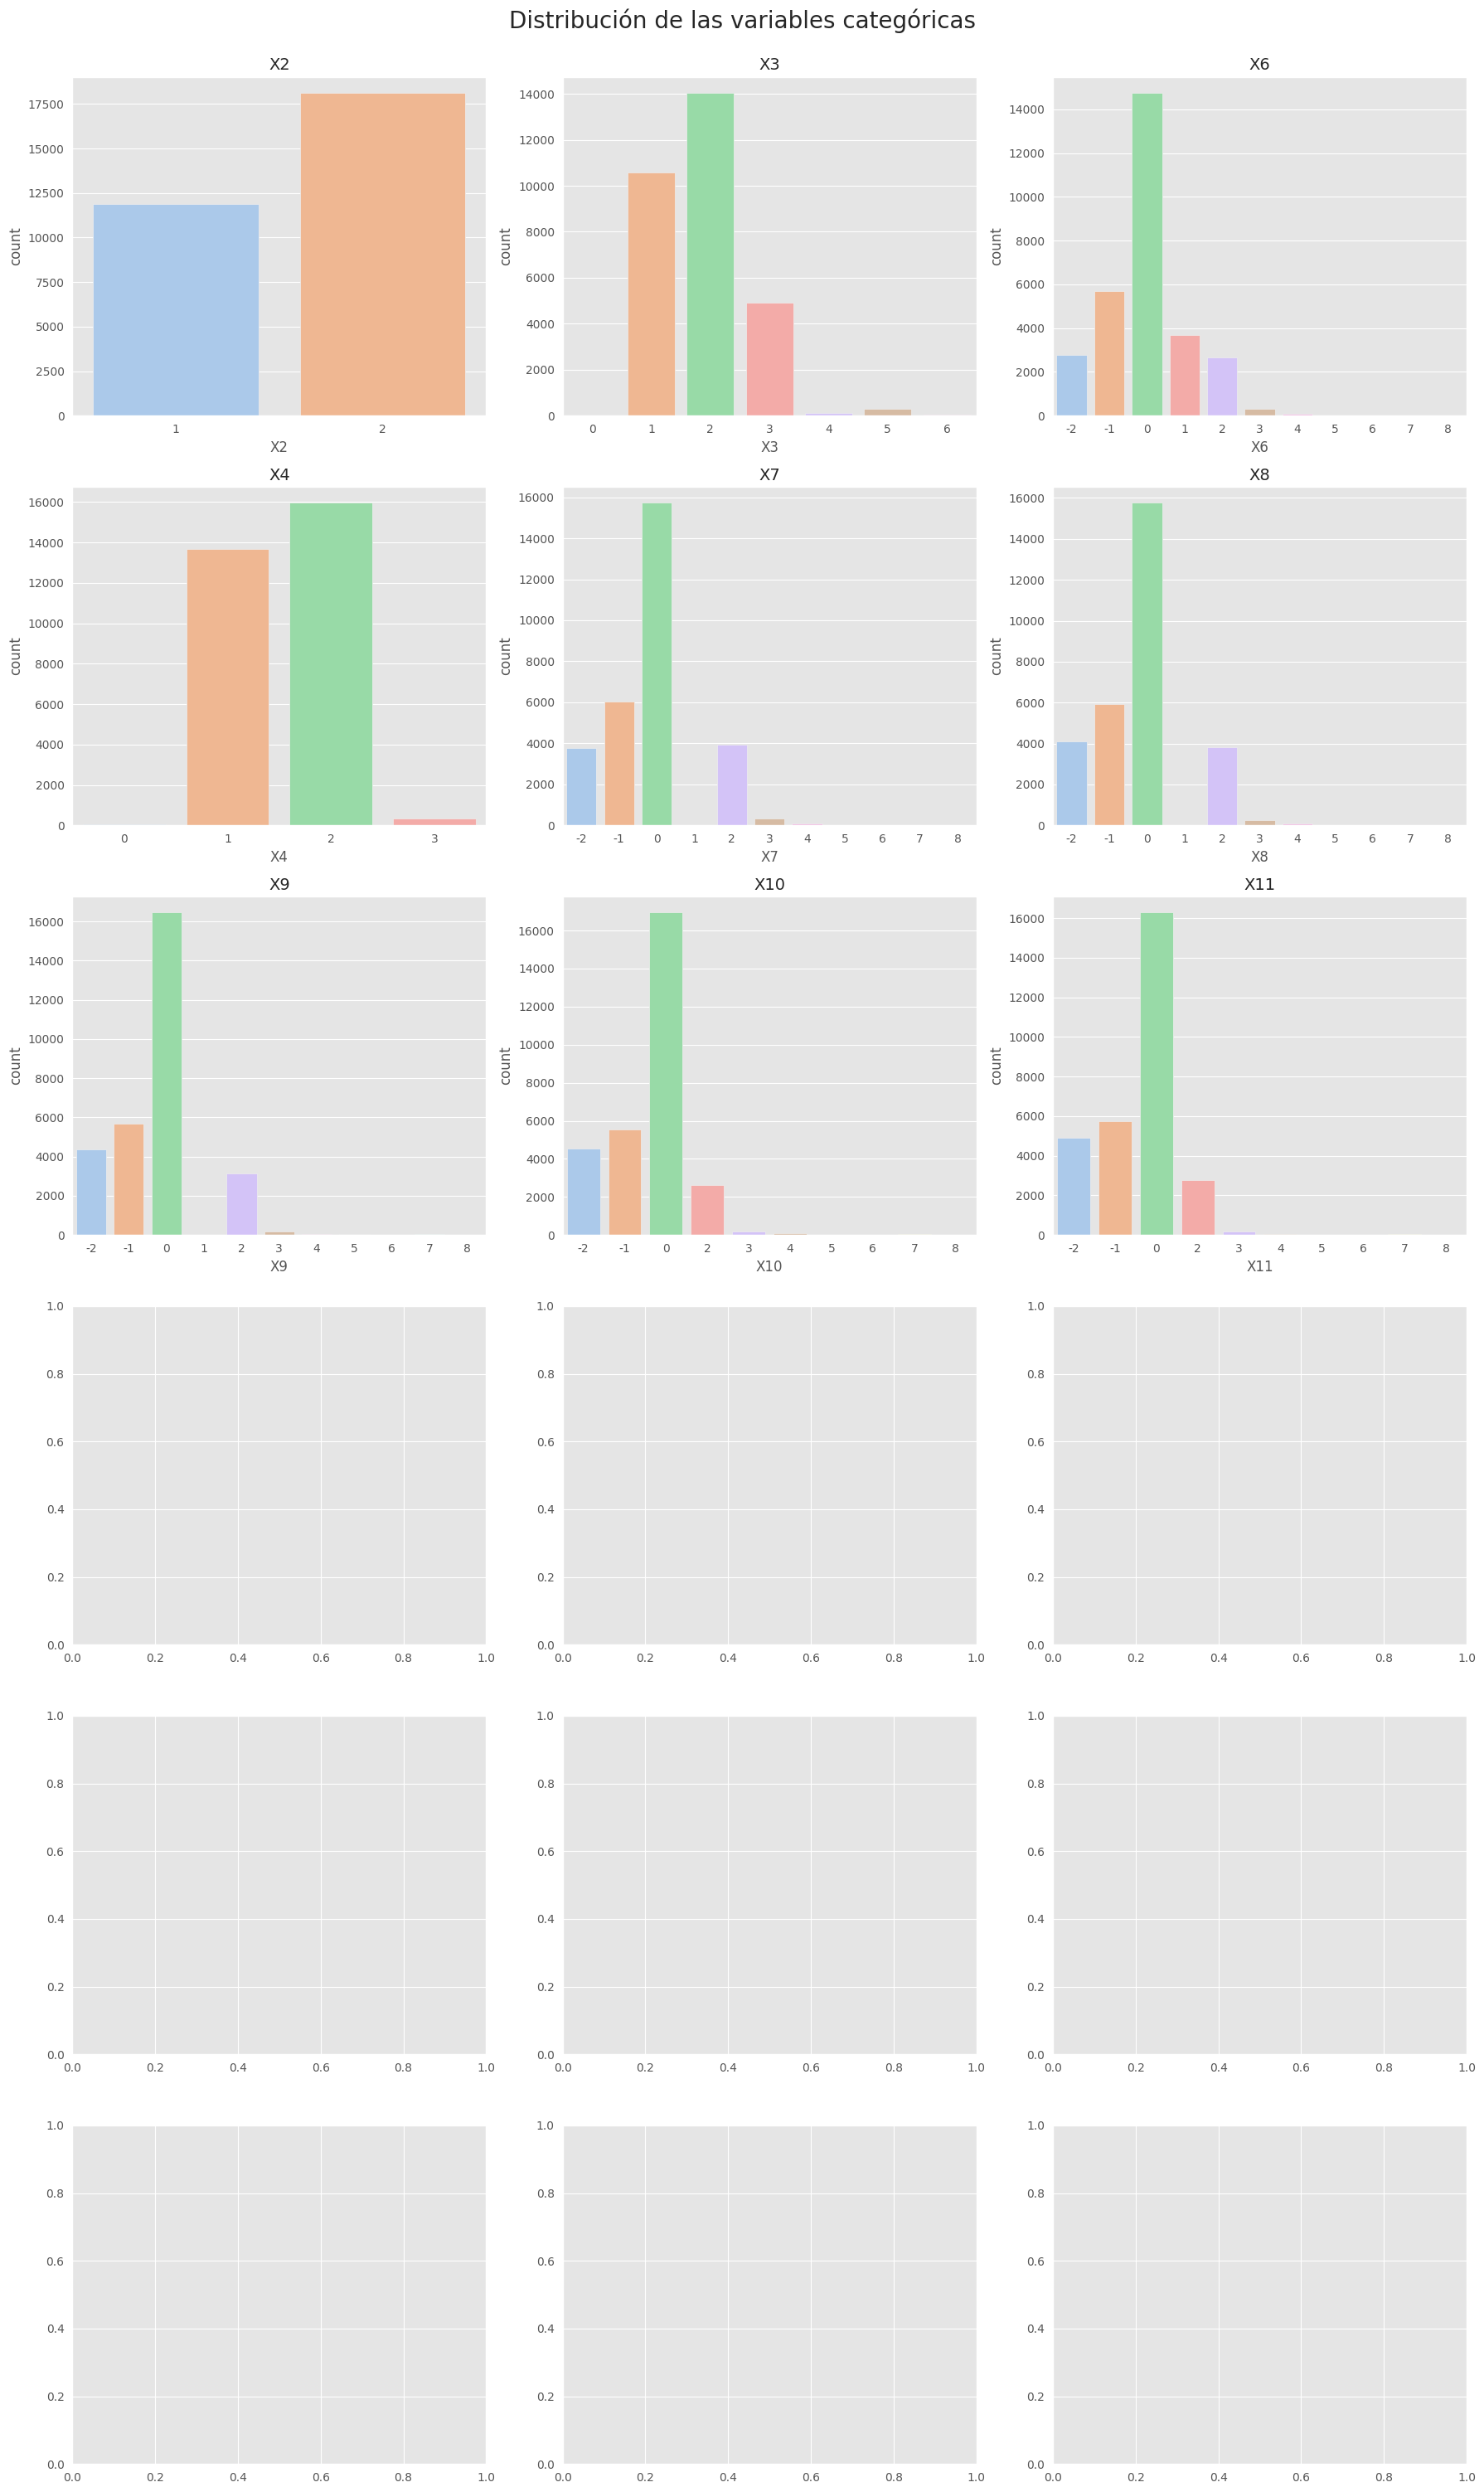

In [15]:
# Distribución de valariables categoricas
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

# Variables categóricas
cat_cols = ['X2', 'X3', 'X6', 'X4','X7', 'X8', 'X9', 'X10', 'X11']

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    if row<6:
        sns.countplot(x=col, data=df, ax=axs[row][pos], palette='pastel')
        axs[row][pos].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

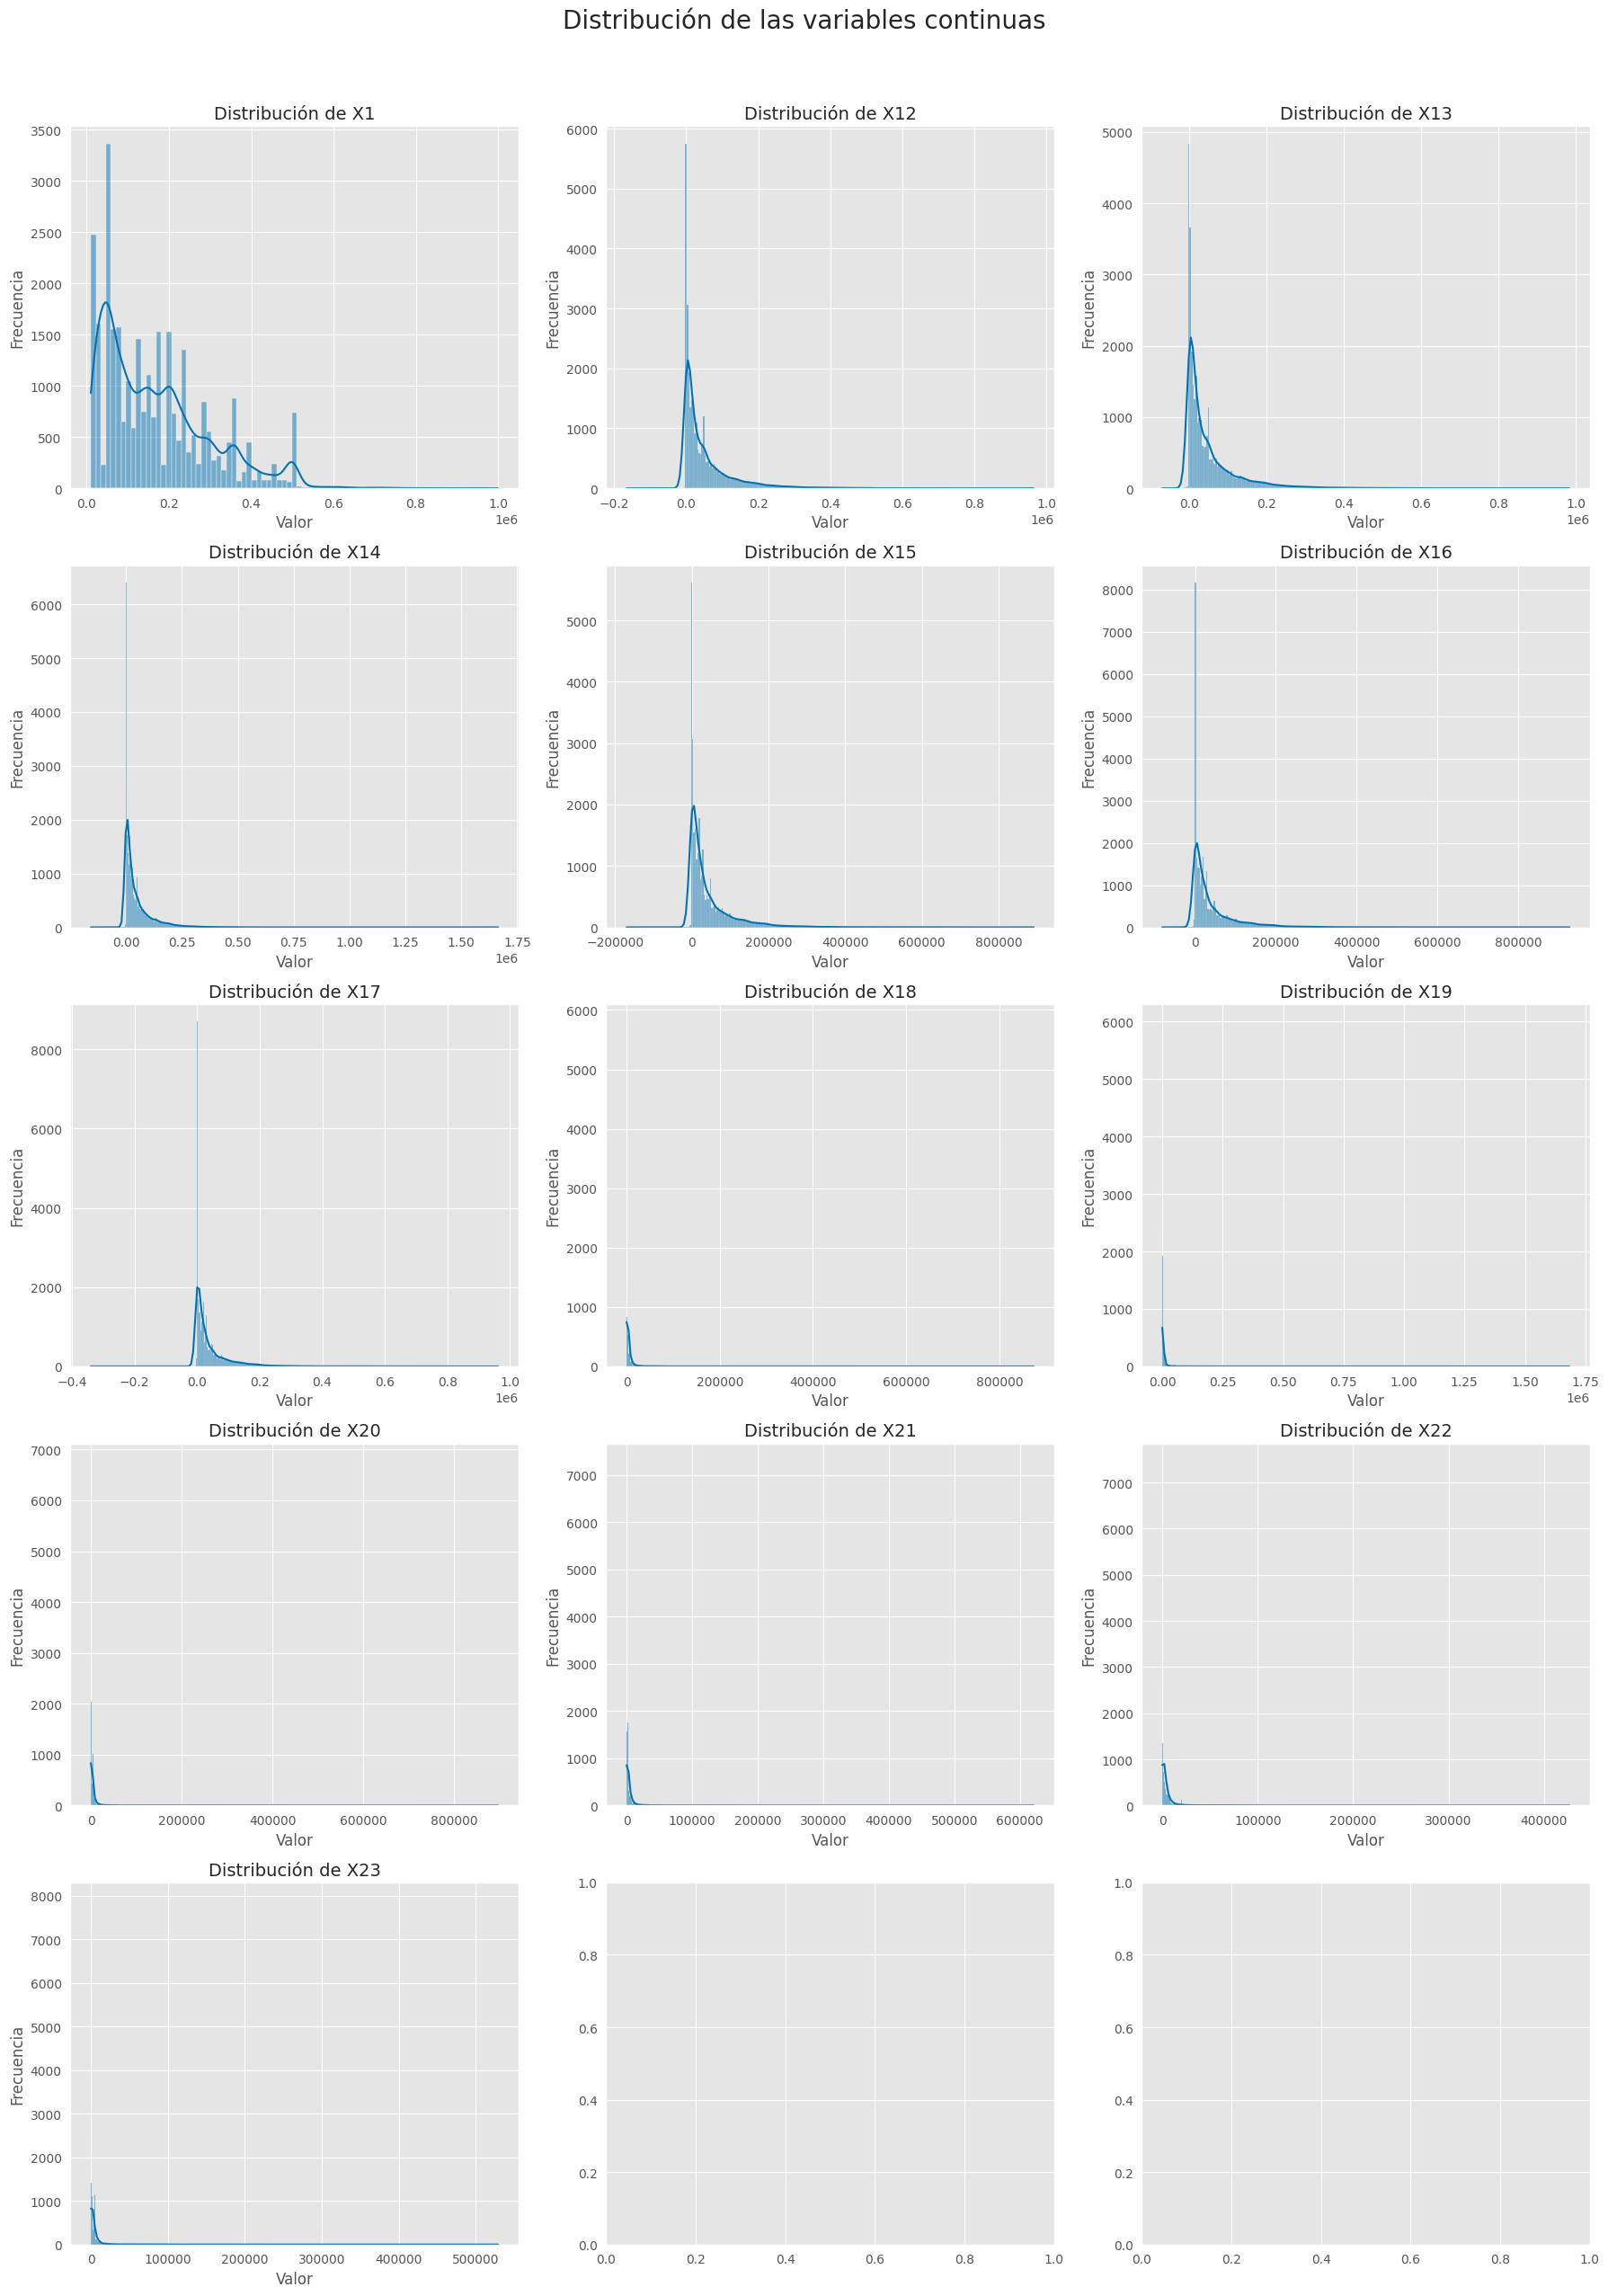

Media de X1: 167484.32266666667
Media de X12: 51223.3309
Media de X13: 49179.07516666667
Media de X14: 47013.1548
Media de X15: 43262.94896666666
Media de X16: 40311.40096666667
Media de X17: 38871.7604
Media de X18: 5663.5805
Media de X19: 5921.1635
Media de X20: 5225.6815
Media de X21: 4826.076866666666
Media de X22: 4799.387633333334
Media de X23: 5215.502566666667


In [16]:
# Distribución de Variables Continuas
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(18, 25))
fig.suptitle('Distribución de las variables continuas', fontsize=20, y=1.02)

# Variables numéricas
num_cols = ['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

for i, col in enumerate(num_cols):
    row = i // 3
    pos = i % 3
    sns.histplot(x=col, data=df, ax=axs[row][pos], kde=True, color='#0072B2')
    axs[row][pos].set_title(f'Distribución de {col}', fontsize=14)
    axs[row][pos].set_xlabel('Valor')
    axs[row][pos].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Opcional: Imprimir las medias de las variables por separado
for col in num_cols:
    print(f'Media de {col}: {df[col].mean()}')


La mayoria de las variables continuas se distribuen de manera muy similiar. Hay que mirar si no hay problemas de multicolinealidad.

**N° 3.4 RELACION ENTRE LAS VARIABLES INDEPENDIENTES Y DEPENDIENTE**

---



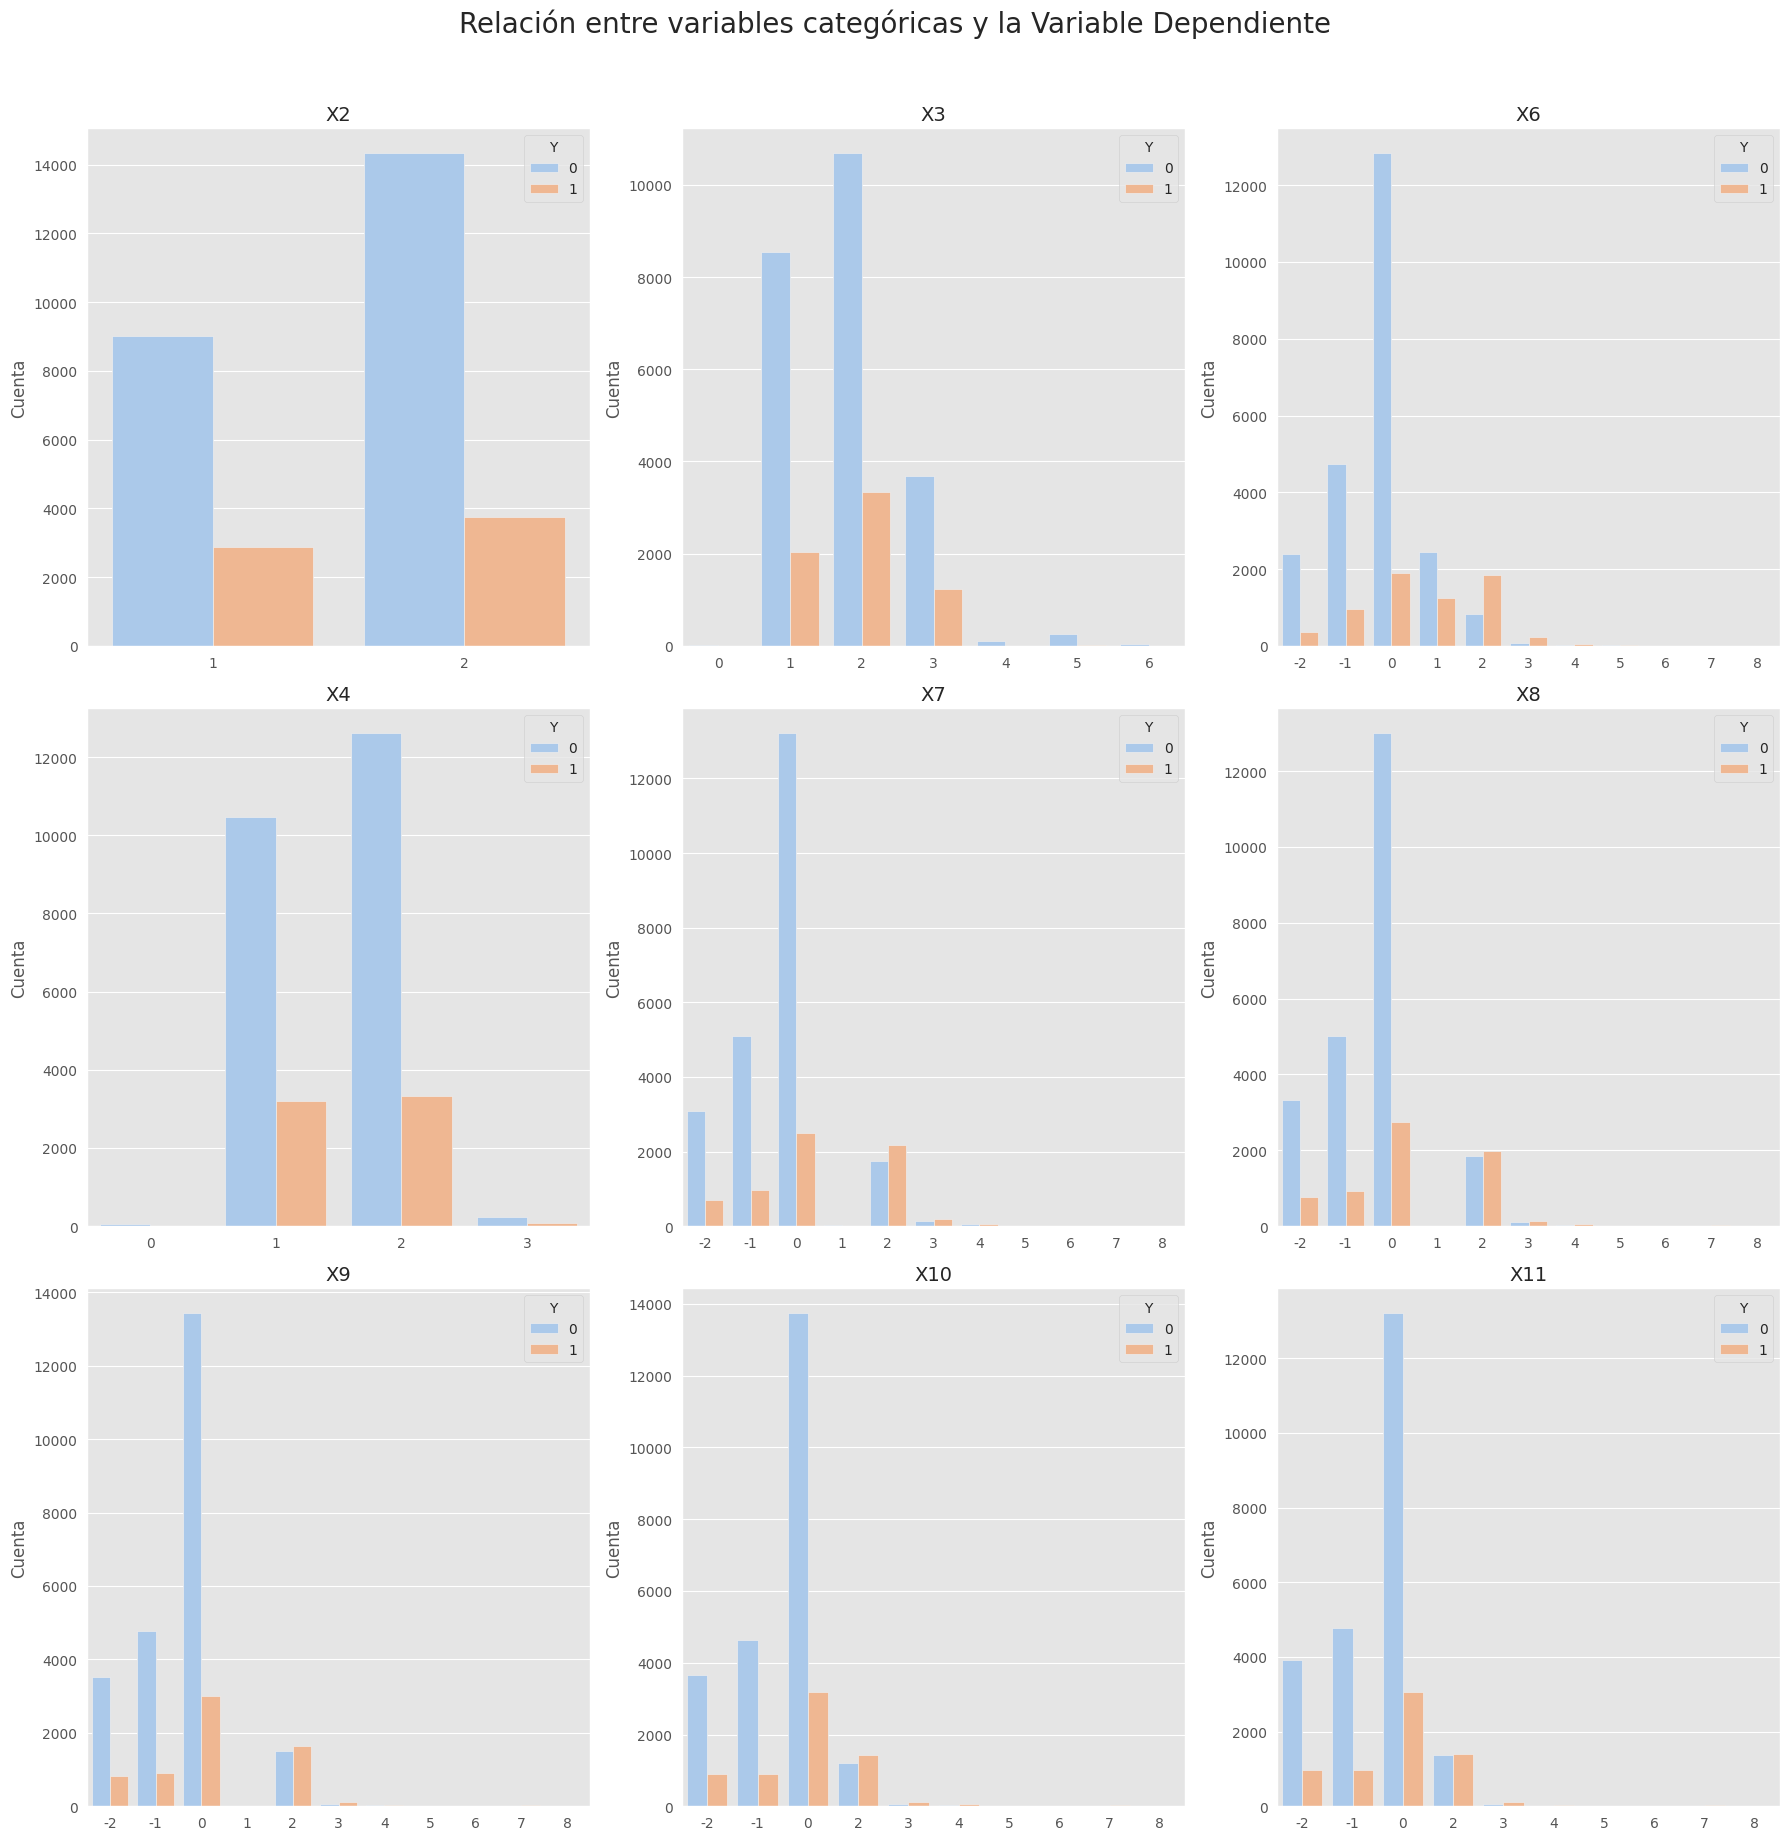

In [17]:
# Relación entre las variables categóricas y la variable dependiente
df_temp = df[['X2', 'X3', 'X6', 'X4', 'X7', 'X8', 'X9', 'X10', 'X11','Y']]
cat_cols = ['X2', 'X3', 'X6', 'X4', 'X7', 'X8', 'X9', 'X10', 'X11']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
fig.suptitle('Relación entre variables categóricas y la Variable Dependiente', fontsize=20, y=1.02)

for i, col in enumerate(cat_cols):
    row = i // 3
    pos = i % 3
    sns.countplot(x=col, hue='Y', data=df_temp, ax=axs[row][pos], palette='pastel')
    axs[row][pos].set_title(col, fontsize=14)
    axs[row][pos].set_xlabel('')
    axs[row][pos].set_ylabel('Cuenta', fontsize=12)
    axs[row][pos].legend(title='Y', loc='upper right')

plt.tight_layout()
plt.show()


<ipython-input-19-c4c0657ebcdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y=col, data=df, ax=axs[i], palette='pastel')
<ipython-input-19-c4c0657ebcdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y=col, data=df, ax=axs[i], palette='pastel')
<ipython-input-19-c4c0657ebcdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y=col, data=df, ax=axs[i], palette='pastel')


IndexError: index 3 is out of bounds for axis 0 with size 3

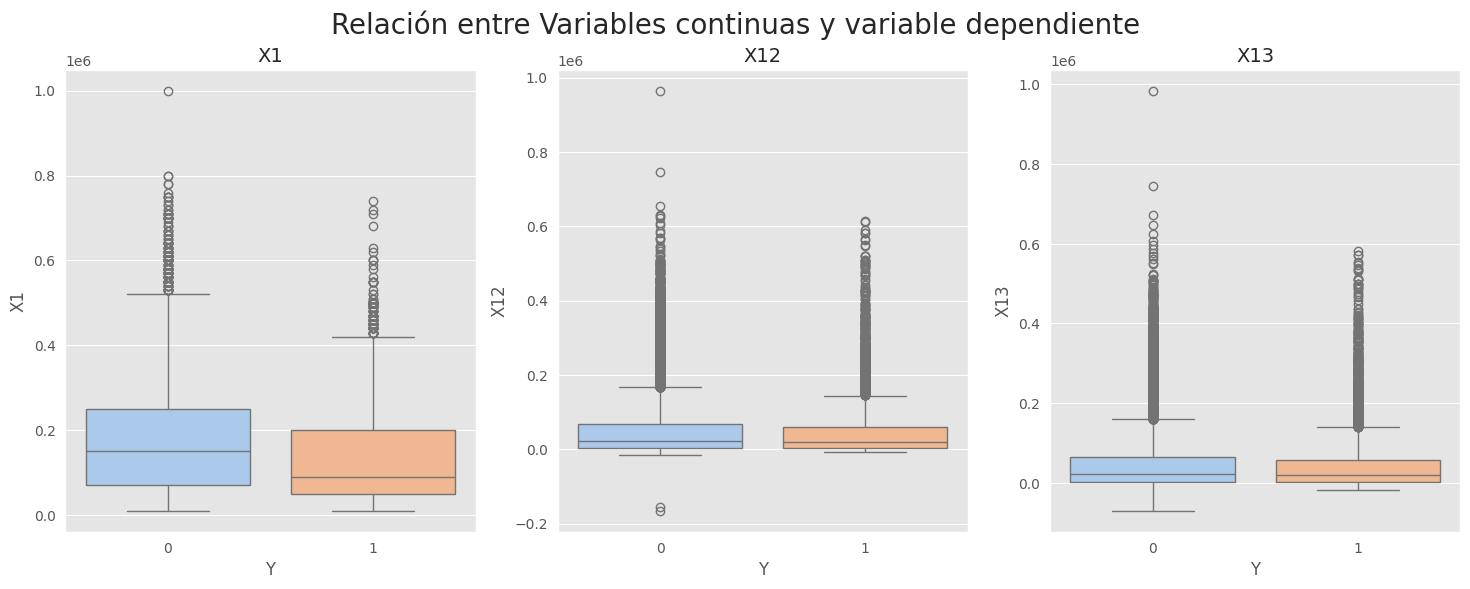

In [19]:
# Relación entre Variables continuas y variable dependiente
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Relación entre Variables continuas y variable dependiente ', fontsize=20)

for i, col in enumerate(num_cols):
    sns.boxplot(x='Y', y=col, data=df, ax=axs[i], palette='pastel')
    axs[i].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

**** N° 3.5 TASA DE NO PAGO***

---




In [20]:
total_registros = df['ID'].nunique()
No_Pago = df[df['Y'] == 0]['ID'].nunique()
Tasa_de_no_pago = No_Pago / total_registros
print('Tasa de No Pago: {:.2%}'.format(Tasa_de_no_pago))


Tasa de No Pago: 77.88%


el 77.8% de los registros del data set estan con la condicion de no pago

***N° 3.6 ANÁLISIS DE MULTICOLINEALIDAD ENTRE LAS VARIABLES***


In [21]:

#Librerias:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Seleccionamos las columnas a analizar
X = df

# Se añade una constantepara el calculo del VIF
X = sm.add_constant(X)
# Calculo del vif para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 5. Mostrar los resultados
print(vif_data)


   Variable        VIF
0     const  66.980107
1        ID   1.014594
2        X1   1.559687
3        X2   1.024603
4        X3   1.128696
5        X4   1.231613
6        X5   1.276242
7        X6   1.997889
8        X7   3.177986
9        X8   3.660189
10       X9   4.293119
11      X10   4.729305
12      X11   3.256204
13      X12  14.046672
14      X13  25.874386
15      X14  21.776035
16      X15  20.452669
17      X16  25.063842
18      X17  15.025918
19      X18   1.708871
20      X19   2.237962
21      X20   1.757209
22      X21   1.650888
23      X22   1.688307
24      X23   1.170091
25        Y   1.141575


Vemos que las variables X12 a X17 presentan una gran multicolinealidad, por lo que va entropeser las predicciones del moldelo. Para solucionar este problema, se va a generar una nueva columna en el dataframe que se llamara X24, las cuales contendran en cada registro el valor promedio entre las 5 variables recien mencionadas. De esta manera se mitiga el problema de la multilinalidad.

In [22]:
# Sumamos todos los registros de las columnas x12,x13,14,x15,x16 y x17 para resolver el problema de multicolinealidad
suma=df[['X12','X13','X14','X15','X16','X17']].sum().sum()


In [23]:
#Promedio de la suma de las 5 variables
promedio= suma/(len(df)*3)


In [24]:
# Nueva columna llamada X24 que contengha para cada registro el valor promedio de las variables
df['X24']=promedio

In [25]:
#Se corrobora que se cargaron bien las modificaciones
print(df)

          ID      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...    X16    X17  \
0          1   20000   2   2   1  24   2   2  -1  -1  ...      0      0   
1          2  120000   2   2   2  26  -1   2   0   0  ...   3455   3261   
2          3   90000   2   2   2  34   0   0   0   0  ...  14948  15549   
3          4   50000   2   2   1  37   0   0   0   0  ...  28959  29547   
4          5   50000   1   2   1  57  -1   0  -1   0  ...  19146  19131   
...      ...     ...  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...   
29995  29996  220000   1   3   1  39   0   0   0   0  ...  31237  15980   
29996  29997  150000   1   3   2  43  -1  -1  -1  -1  ...   5190      0   
29997  29998   30000   1   2   2  37   4   3   2  -1  ...  20582  19357   
29998  29999   80000   1   3   1  41   1  -1   0   0  ...  11855  48944   
29999  30000   50000   1   2   1  46   0   0   0   0  ...  32428  15313   

         X18    X19    X20   X21    X22   X23  Y         X24  
0          0    689      0     0    

Cuando se genere un modelo, no se usaran las variables x12 a x17 ya que tienen una gran multicolinealidad entre si, por lo que en el modelo se usara el promedio que nace de sumar las tres columnas y dividirlas por la cantidad de registros, de esta manera, se soluciona en parte el problema de multicolinadidad de una forma representativa.

***N4° BUSQUEDA DE RELACIONES Y CONSTRUCCIÓN DEL MODELO PREDICTIVO***


**N° 4.1 ¿HAY RELACION ENTRE EL NIVEL DE EDUCACIÓN Y LA PROBABILIDAD DE PAGAR ?**

---




In [26]:
#TABLA DE CONTINGENCIA NIVEL DE EDUCACIÓN VS CONDICIÓN DE PAGO
pd.crosstab(index=df['X3'], columns=df['Y'], normalize='index').style.format("{:.2%}")


Y,0,1
X3,,
0,100.00%,0.00%
1,80.77%,19.23%
2,76.27%,23.73%
3,74.84%,25.16%
4,94.31%,5.69%
5,93.57%,6.43%
6,84.31%,15.69%


Se puede apreciar que cuando el nivel de educación es mas elevado, la es mas probable que la condicón del registro sea que paga

**N°4.2 RELACION ENTRE EL ESTADO CIVIL Y LA PROBABILIDAD DE PAGAR O NO**

---



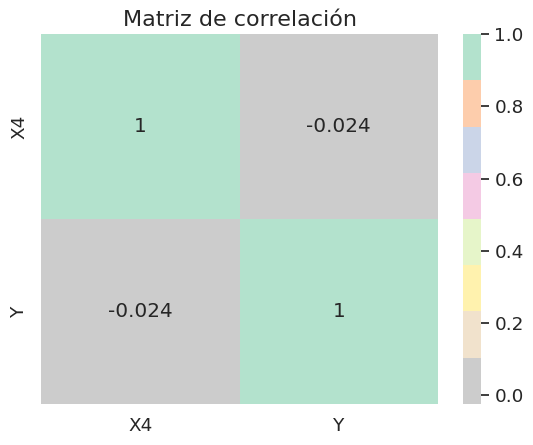

In [27]:
# Correlación entre la variable independiente y el estado civil
corr_matrix = df[['X4','Y']].corr()


sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2_r')
plt.title('Matriz de correlación', fontsize=16)
plt.show()

Se puede apreciar una relacion negativa entre el estado civil y la categoria de ser pagador o no, pero es muy debil. Lo que significa que el estado civil no es un determinante  muy importante en la determinacion de ser pagador o no

**N° 4.2 RELACION ENTRE LA EDAD DEL CLIENTE Y LA PROBILIDAR DE SER PAGADOPR O NO**

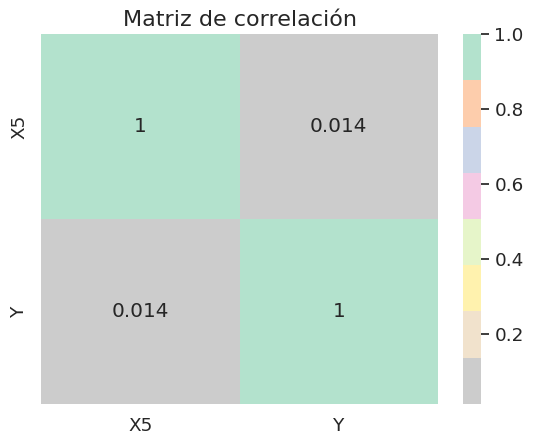

In [28]:
# Correlación entre la variable independiente y la edad
corr_matrix = df[['X5','Y']].corr()


sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2_r')
plt.title('Matriz de correlación', fontsize=16)
plt.show()

Se puede apreciar una relacion positiva entre la edad del cliente  y la categoria de ser pagador o no muy debil. Lo que significa que la edad no es un determinante  muy importante en la determinacion de ser pagador o no

**N°4.3 MODELOS PREDICTIVOS**


 **N° 4.3.1 MODELO DE REGRESIÓN LOGISTICA** COMO SE ESTA TRATANDO DE PREDECIR UNA VARIABLE BINARIA, ES DECIR, ES PAGADOR O NO, A PARTIR DE VARIABLES NUMERICAS Y CATEGORICAS SE MODELA UN MODELO PREDICTIVO DE REGRESIÓN LOGISTICA, ESTE MODELO NOS PERMITE MODELAR UNA VARIABLE INDEPENDIENTE A PARTIR DE VARIABLES NUMERICAS Y CATEGORICAS, AUNQUE ESTAS NO TENGAN UNA RELACION LINEAL MUIY FUERTE COMO HEMOS VISTO EN LOS INCISOS ANTERIORES.


---



# **NORMALIZACION Y ESTANDARIZACIÓN DEL DATAFRAME**
Se normaliza para evitar la redundancia en los valores

In [29]:
# Normalización de los valores:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Estandarizar los datos
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Datos Estandarizados:\n", df_scaled)


Datos Estandarizados:
              ID        X1        X2        X3        X4        X5        X6  \
0     -1.731993 -1.136720  0.810161  0.185828 -1.057295 -1.246020  1.794564   
1     -1.731878 -0.365981  0.810161  0.185828  0.858557 -1.029047 -0.874991   
2     -1.731762 -0.597202  0.810161  0.185828  0.858557 -0.161156  0.014861   
3     -1.731647 -0.905498  0.810161  0.185828 -1.057295  0.164303  0.014861   
4     -1.731531 -0.905498 -1.234323  0.185828 -1.057295  2.334029 -0.874991   
...         ...       ...       ...       ...       ...       ...       ...   
29995  1.731531  0.404759 -1.234323  1.451114 -1.057295  0.381275  0.014861   
29996  1.731647 -0.134759 -1.234323  1.451114  0.858557  0.815221 -0.874991   
29997  1.731762 -1.059646 -1.234323  0.185828  0.858557  0.164303  3.574267   
29998  1.731878 -0.674276 -1.234323  1.451114 -1.057295  0.598248  0.904712   
29999  1.731993 -0.905498 -1.234323  0.185828 -1.057295  1.140680  0.014861   

             X7        X8   

In [30]:
# REGRESION LOGISTICA
# LIBRERIAS UTILIZADAS
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# DEFINICION DE VARIABLES PREDICTORIAS
x = df_scaled.drop(['Y', 'ID', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17'], axis=1)
# DEFINICION DE LA VARIABLE A PREDECIR
y = df['Y']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Mostrar la métrica de precisión
print(f'Valor de Accuracy: {accuracy_score(y_test, y_pred):.4f}')


Accuracy: 0.8084
Valor de Accuracy: 0.8084


**N°4.3.2 MODELO DE ARBOL DE DECISIÓN**


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Modelo
dt = DecisionTreeClassifier()

# Entrenamiento
dt.fit(X_train, y_train)

# Predicción
y_pred = dt.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)


Precisión del modelo de árbol de decisión: 0.7224444444444444


**N°4.3.2 MODELO DE VECTORES DE SOPORTE**

In [32]:
# lIBRERIA:
from sklearn.svm import SVC
svc = SVC()

# Entrenamiento
svc.fit(X_train, y_train)

# Predicción
y_pred = svc.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de SVM:", accuracy)

Precisión del modelo de SVM: 0.8185555555555556


**N°5 VALIDACIÓN DE LOS MODELOS**

---



In [33]:
#VALIDACIÓN cRUZADA
# libreria
from sklearn.model_selection import KFold, cross_val_score


# número de folds para KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# modelos
models = [
    ('Regresion Logistica', LogisticRegression(max_iter=1000)),
    ('Arbol de Decision', DecisionTreeClassifier()),
    ('SVM', SVC())
]

# listas
results = []
names = []

print('Metricas \n----------------------\n')

# Evaluación de  cada modelo
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')


Metricas 
----------------------

Regresion Logistica: 0.8109 (0.0059)
Arbol de Decision: 0.71957 (0.0043)
SVM: 0.82 (0.00421)


El modelo de regrsión Logistíca tiene una precisíon media de exito del 81.09%, una desviacion estandar del 0.5%. En cambio el modelo SVM tiene una precisión media del 82% y una desviación estandar del 0.4 %. En cambio el arbol de decisión posee una precisión media del 72.43% con uns desviación estandar promedio del 0.5%. Por lo tanto, a simple vista, el modelo predictivo que mejor valores predichos posee es el modelo SVM, ya que tiene la presición media mas alta, y la desviación media mas baja. Sin embargo, se va a proceder a calcular hiperparametros para corroborar que este es el mejor modelo, para modelar la variable independiente.
---



**CALCULO DE HIPERPARAMETROS**

---



In [34]:
#Librerias:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Se reduce el tamaño de la muestra: Se hizo esto, ya que mi computadora no corria el codigo con la muestra completa
# Se usan el 30% de los datos:
X_train_sample = X_train.sample(frac=0.3, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Parámetros optimizados (reducidos)
param_grids = {
    'Regresion Logistica': {'C': [0.1, 1], 'solver': ['liblinear']},
    'Arbol de Decision': {'max_depth': [3, 5], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.1, 1], 'kernel': ['linear']}
}
# modelos
models = [
    ('Regresion Logistica', LogisticRegression(max_iter=500)),
    ('Arbol de Decision', DecisionTreeClassifier()),
    ('SVM', SVC())
]

# Iterar sobre cada modelo y aplicar RandomizedSearchCV
for name, model in models:
    print(f"Optimización para: {name}")
    random_search = RandomizedSearchCV(model, param_distributions=param_grids[name], cv=2, n_iter=3, random_state=42, n_jobs=-1)
    random_search.fit(X_train_sample, y_train_sample)

    # Mejor modelo encontrado
    best_model = random_search.best_estimator_
    print(f'Mejor Modelo para {name}: {best_model}')
    print(f'Mejores Parámetros para {name}: {random_search.best_params_}')
    print("-" * 50)




Optimización para: Regresion Logistica


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor Modelo para Regresion Logistica: LogisticRegression(C=1, max_iter=500, solver='liblinear')
Mejores Parámetros para Regresion Logistica: {'solver': 'liblinear', 'C': 1}
--------------------------------------------------
Optimización para: Arbol de Decision
Mejor Modelo para Arbol de Decision: DecisionTreeClassifier(max_depth=3, min_samples_split=5)
Mejores Parámetros para Arbol de Decision: {'min_samples_split': 5, 'max_depth': 3}
--------------------------------------------------
Optimización para: SVM


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor Modelo para SVM: SVC(C=0.1, kernel='linear')
Mejores Parámetros para SVM: {'kernel': 'linear', 'C': 0.1}
--------------------------------------------------


In [35]:
#creacion de la matriz que contiene los parametros del mejor modelo
best_models = []
for name, model in models:
    random_search = RandomizedSearchCV(model, param_distributions=param_grids[name], cv=2, n_iter=3, random_state=42, n_jobs=-1)
    random_search.fit(X_train_sample, y_train_sample)
    best_model = random_search.best_estimator_
    best_models.append((name, best_model))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


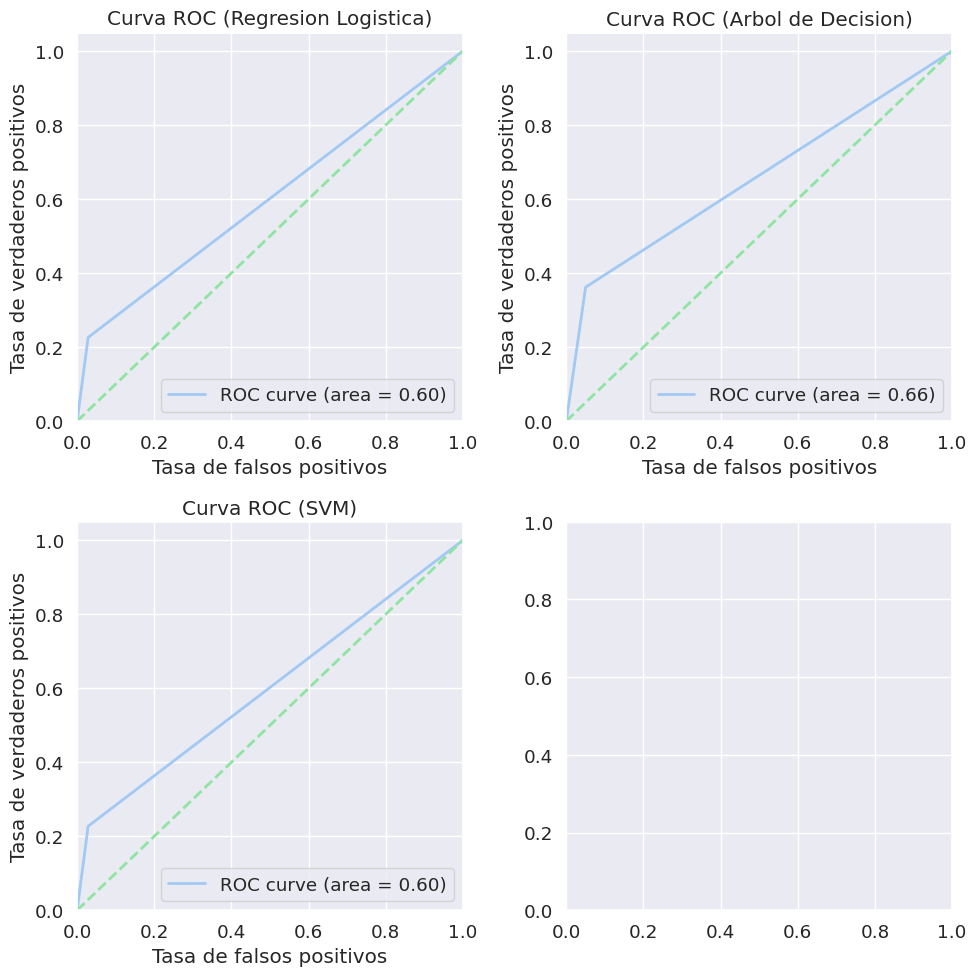

In [36]:
from sklearn.metrics import roc_curve, auc
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()

for i, (name, model) in enumerate(models):
    y_pred = best_models[i][1].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Gráficas
    df_temp = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
    colors = sns.color_palette('pastel')
    sns.lineplot(x='fpr', y='tpr', data=df_temp, color=colors[0], lw=2, label='ROC curve (area = %0.2f)' % roc_auc, ax=axs[i])
    axs[i].plot([0, 1], [0, 1], color=colors[2], lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('Tasa de falsos positivos')
    axs[i].set_ylabel('Tasa de verdaderos positivos')
    axs[i].set_title('Curva ROC (' + name + ')')
    axs[i].legend(loc="lower right")

plt.tight_layout()
plt.show()

**N°8 CONSLUSIÓN**

---



El presente trabajo ha permitido analizar un conjunto de variables clave que influyen significativamente en la probabilidad de que un cliente incumpla con el pago de su tarjeta de crédito. Variables como la edad, el nivel de educación, el género, el estado civil, y el historial de pagos y montos adeudados juegan un rol crucial en la predicción de este comportamiento.

1.   Edad: Se ha observado que los clientes más jóvenes tienden a tener una mayor probabilidad de incumplir sus pagos, posiblemente debido a factores como la inestabilidad laboral o falta de experiencia financiera. Por otro lado, los clientes de mayor edad suelen mostrar un comportamiento más conservador, con menores tasas de incumplimiento.
2.  Nivel de educación: Los individuos con mayor nivel educativo tienden a ser más conscientes del impacto de sus decisiones financieras y, en general, muestran una menor tasa de incumplimiento. Sin embargo, esto no es un factor determinante por sí solo, ya que personas con baja educación también pueden ser buenos pagadores dependiendo de otros factores.
3.  El análisis muestra que las personas casadas o en relaciones estables tienden a tener menores probabilidades de incumplir sus pagos. Esto podría deberse a una mayor estabilidad financiera en hogares con doble ingreso, así como una mayor aversión al riesgo cuando se trata de responsabilidades financieras compartidas.
4.   Este es, sin duda, el predictor más fuerte de incumplimiento. Los clientes con un historial de pagos atrasados o montos significativos adeudados presentan un riesgo considerablemente mayor de seguir incumpliendo. Por lo tanto, los análisis de crédito deben priorizar estas variables al momento de calcular el riesgo de incumplimiento.






El uso de un modelo predictivo que incluya estas variables puede mejorar significativamente la capacidad de las instituciones financieras para anticipar el comportamiento de los clientes y tomar medidas preventivas. Esto puede incluir desde ajustar las líneas de crédito hasta implementar programas de educación financiera para grupos de alto riesgo. Asimismo, sería conveniente considerar estrategias de segmentación de clientes para diseñar políticas personalizadas, orientadas a mejorar las probabilidades de pago.

Finalmente, el modelo que mejor se ajusto a la predicción es el modelo de arbol de decición, ya que este tuvo un area ROC de 0.66, sin embargo este modelo es el que mejor media de precisión tuvo. Como el modelo de regresión logistioca fue el que mejor media de prediccón tuvo, y la diferencia del area ROC es muy pequeña en compararación con el area del arbol de decisión, recomandariamos usar este ultimo modelo.
